In [45]:
import numpy as np
import math

In [63]:
# Hint the PMF of N is p_N(k) where p_N is
def binomial(n,k):
    return (math.factorial(n)/(math.factorial(k)*math.factorial(n-k)))
pN = 11/20
p_N = lambda k: binomial(20,k)*(1-pN)**(20-k)*(pN)**k
# Hint the PMF of Y is p_Y(n,k) where p_Y is
pY = 1/2
p_Y = lambda n, k: binomial(20-n,k)*((1-pY)**(20-n-k))*((pY)**k)

results = np.array([])
#For each threashold o to 20
for threashold in range(0,21):
    #Want the probability that know is less then 10 given that we pass
    #For each case divide probability that we pass with under 10 known by probability that we pass
    pass_probsum = 0
    pass_know_under_10_probsum = 0
    
    for known in range(0,21):
        #We can have a nr of correct guesses from 0 to 20-known
        for correct_guess in range(0,21-known):
            #Calc probability of this ocurring
            occuranceprob = p_N(known)*p_Y(known,correct_guess)
            if(correct_guess + known >= threashold and known <10):
                pass_know_under_10_probsum += occuranceprob
                pass_probsum += occuranceprob
            elif(correct_guess + known >= threashold):
                pass_probsum += occuranceprob
    results = np.append(results, pass_know_under_10_probsum/pass_probsum)
print(results)

[0.24928936 0.24928936 0.24928936 0.24928936 0.24928936 0.2492893
 0.24928868 0.2492833  0.24924629 0.24903903 0.2480857  0.2446082
 0.23494397 0.21475642 0.18267139 0.14272522 0.10227043 0.0676281
 0.04166472 0.02415113 0.01328746]


In [64]:
#Find first entry leq 10%
for i in range(len(results)):
    if results[i]<0.1:
        print(i)
        break

17


In [90]:


def problem2_LCG(size=None, seed = 0):
    """
    A linear congruential generator that generates pseudo random numbers according to size.
    
    Parameters
    -------------
    size : an integer denoting how many samples should be produced
    seed : the starting point of the LCG, i.e. u0 in the notes.
    
    Returns
    -------------
    out : a list of the pseudo random numbers
    """
    m = 2**31-1
    a = 10101 
    b = 12345 
    
    result = []
    for _ in range(size):
        seed = (a*seed+b)%m
        result.append(seed)
    
    return result

In [91]:

def problem2_uniform(generator=None, period = 1, size=None, seed=0):
    """
    Takes a generator and produces samples from the uniform [0,1] distribution according
    to size.
    
    Parameters
    -------------
    generator : a function of type generator(size,seed) and produces the same result as problem1_LCG, i.e. pseudo random numbers in the range {0,1,...,period-1}
    period : the period of the generator
    seed : the seed to be used in the generator provided
    size : an integer denoting how many samples should be produced
    
    Returns
    --------------
    out : a list of the uniform pseudo random numbers
    """
    
    #Generate the pseudo random numbers
    pseudo = generator(size, seed)
    #Normalize the pseudo random numbers
    pseudo = [x/period for x in pseudo]
    return pseudo

In [104]:
def pX(x):
    return (np.pi/2)*abs(np.sin(x*2*np.pi))

def problem2_accept_reject(uniformGenerator=None, size=None, seed=0):
    """
    Takes a generator that produces uniform pseudo random [0,1] numbers
    and produces samples from (pi/2)*abs(sin(x*2*pi)) using an Accept-Reject
    sampler with the uniform distribution as the proposal distribution
    Parameters
    -------------
    generator : a function of the type generator(size,seed) that produces uniform pseudo random numbers from [0,1]
    seed : the seed to be used in the generator provided
    size : an integer denoting how many samples should be produced
    Returns
    --------------
    out : a list of the pseudo random numbers with the specified distribution
    """
    results = []
    while len(results) < size:
        # print(len(results))
        #Generate as many proposals and accept/reject as remains
        proposal = uniformGenerator( size - len(results), seed)
        seed = problem2_LCG(1,seed)[0]
        accept_threashold = uniformGenerator( size - len(results), seed)
        seed = problem2_LCG(1,seed)[0]
        #Adjusting constant M for given interval given by 1*M = pi/2 -> M =pi/2
        M = np.pi/2
        #For each point
        for i in range(len(proposal)):
            rx = pX(proposal[i])/M
            if accept_threashold[i]<rx:
                results.append(proposal[i])
    
    
    return results

LCG output: [22446, 226739391, 1077033134, 2107026824, 1515019799, 246533522, 1301571194, 275756005, 125128691, 1204535700]
Uniform sampler [1.0452233259776716e-05, 0.1055837567455991, 0.5015326358850731, 0.981160823712666, 0.7054860702275699, 0.11480111727248929, 0.6060913180029445, 0.12840889633093444, 0.05826758735732529, 0.5609056449313209]
Accept-Reject sampler [0.1055837567455991, 0.7054860702275699, 0.11480111727248929, 0.6060913180029445, 0.12840889633093444, 0.707925199860672, 0.7524495412374146, 0.1156577552276001, 0.258991302577309, 0.7172868958289208, 0.3149405165179356, 0.21416309625569876, 0.7054860702275699, 0.11480111727248929, 0.6060913180029445, 0.12840889633093444, 0.7054860702275699, 0.11480111727248929, 0.6060913180029445, 0.12840889633093444]


(array([0.03243211, 0.08088008, 0.14254112, 0.19158968, 0.22542318,
        0.27507234, 0.32852526, 0.35955598, 0.42842416, 0.47066598,
        0.50469968, 0.56175617, 0.58237658, 0.64463822, 0.75594843,
        0.75554803, 0.75194446, 0.86385526, 0.88107231, 0.90149252,
        0.96355397, 0.98077101, 1.04203166, 1.05204157, 1.06845783,
        1.10929826, 1.14873731, 1.18197021, 1.1943825 , 1.24022789,
        1.31430122, 1.3389256 , 1.34913571, 1.36735375, 1.36555196,
        1.41039636, 1.43722292, 1.48306831, 1.44683244, 1.46645186,
        1.54913372, 1.5287135 , 1.51069566, 1.54492956, 1.54432896,
        1.57475909, 1.58376801, 1.58997415, 1.55694145, 1.55834284,
        1.5629474 , 1.56154601, 1.5731575 , 1.60538942, 1.55333788,
        1.5175024 , 1.50368873, 1.50308813, 1.55413867, 1.49447961,
        1.46084631, 1.44543105, 1.46384928, 1.47245781, 1.46284829,
        1.40479081, 1.35714364, 1.33432104, 1.30689389, 1.30048755,
        1.22441223, 1.23422194, 1.15454306, 1.21

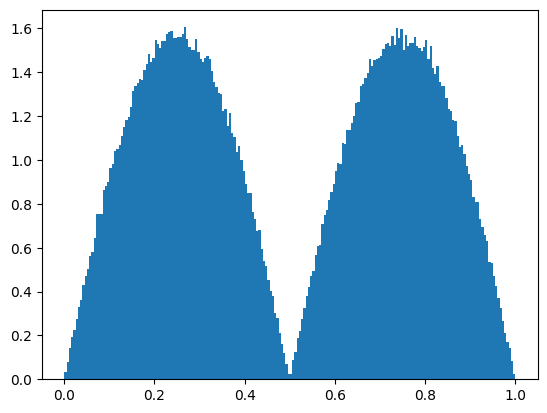

In [109]:
print("LCG output: %s" % problem2_LCG(size=10, seed = 1))

period = 2**31-1

print("Uniform sampler %s" % problem2_uniform(generator=problem2_LCG, period =period, size=10, seed=1))
uniform_sampler = lambda size,seed: problem2_uniform(generator=problem2_LCG,period = period, size=size, seed=seed)
print("Accept-Reject sampler %s" % problem2_accept_reject(uniformGenerator =uniform_sampler,size=20,seed=1))
res = problem2_accept_reject(uniformGenerator =uniform_sampler,size=1000000,seed=1)
import matplotlib.pyplot as plt

plt.hist(res, 200, density=True)